# The Phillips curve: Inflation vs Unemployment - It's (partially) broken!
**Ajay Jain  
AP Macroeconomics  
May 5th, 2016**

Data sourced from Wolfram Alpha and collected by US federal government agencies.

In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy

from matplotlib import style
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
style.use('ggplot')

In [52]:
data1 = pd.read_csv("data/us_inflation_vs_unemployment.csv")

data1['inverse civilian unemployment rate, percent'] = np.power(data1['civilian unemployment rate, percent'], -1)

data1['date'] = pd.to_datetime(data1['date'])
data1['year'], data1['month'] = data1['date'].dt.year, data1['date'].dt.month
data1['decade'] = np.floor(data1['year']/10)*10

data1.drop(data1.columns[3], axis=1, inplace=True)

In [53]:
def box(X, Y, W, H, color='red', fill=None, alpha=1):
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((X, Y), W, H, fill=fill, facecolor=fill, alpha=alpha, edgecolor=color, lw=2, ls='--'))
    
def box_date(startTime, endTime, Y, H, color='red', fill=None, alpha=1):
    start = mdates.date2num(pd.to_datetime(startTime))
    end = mdates.date2num(pd.to_datetime(endTime))
    W = end-start
    box(start, Y, W, H, color, fill, alpha)

**First 5 rows of the cleaned dataset:**

In [54]:
data1.drop(['inverse civilian unemployment rate, percent'], axis=1).head()

,date,"inflation rate, percent","civilian unemployment rate, percent",year,month,decade
0,1948-01-01,10.230,3.4,1948,1,1940
1,1948-03-01,6.849,4.0,1948,3,1940
2,1948-04-01,8.676,3.9,1948,4,1940
3,1948-06-01,9.545,3.6,1948,6,1940
4,1948-07-01,9.910,3.6,1948,7,1940


**Summary statistics:**

In [55]:
data1.drop(['month', 'decade', 'inverse civilian unemployment rate, percent'], axis=1).describe()

,"inflation rate, percent","civilian unemployment rate, percent",year
count,546.00000,546.000000,546.000000
mean,3.56567,5.823443,1981.626374
std,2.97024,1.641469,19.720421
min,-2.86900,2.500000,1948.000000
25%,1.64050,4.700000,1965.000000
50%,2.93650,5.600000,1982.000000
75%,4.58275,6.900000,1999.000000
max,14.76000,10.800000,2016.000000


## Natural rate of unemployment
The natural rate of unemployment is the percentage of the a poputation considered to be in the workforce who are completely unemployed. This includes structural unemployment due to disappearing jobs and frictional unemployment due to temporary transitional job loss. In economic theory, monetarists believe that the NRU is the location where the Long Run Phillips curve crosses the x-axis. The federal government estimates that the [**natural rate of unemployment stands at 5.3%**](https://mises.org/library/fed%E2%80%99s-confusion-over-natural-rate-unemployment-and-inflation).

From the data, I found a _**mean unemployment of 5.82%**_ and a _**median unemployment rate of 5.60%**_ in historical, quarterly US economic reports. _Historically, long run unemployment has tended toward a slightly higher rate than the federal estimate._

Mean unemployment, US:   5.82%
Median unemployment, US: 5.60%


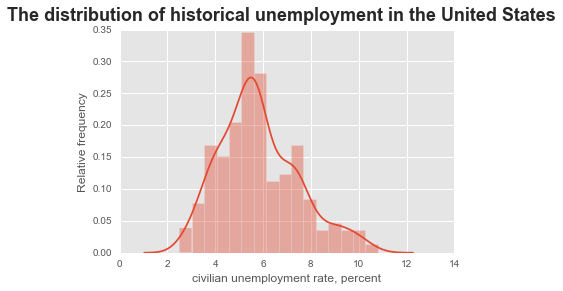

In [56]:
U_mean = data1['civilian unemployment rate, percent'].mean()
U_med = data1['civilian unemployment rate, percent'].median()
print "Mean unemployment, US:   %.2f%%\nMedian unemployment, US: %.2f%%" % (U_mean, U_med)

distax = sns.distplot(data1['civilian unemployment rate, percent'])
sns.plt.gcf().suptitle('The distribution of historical unemployment in the United States', fontsize=18, fontweight='bold')
distax.set_ylabel('Relative frequency')
sns.plt.show()

## Unemployment and inflation: Are they related?

### Macroeconomic theory: the Phillips curve
[Investopedia](http://www.investopedia.com/terms/p/phillipscurve.asp) describes the Phillips curve as follows:
> The Phillips curve is an economic concept developed by A. W. Phillips stating that inflation and unemployment have a stable and inverse relationship. According to the Phillips curve, the lower an economy's rate of unemployment, the more rapidly wages paid to labor increase in that economy.

A. W. Phillips described a downward sloping graph of unemployment on the x-axis versus inflation on the y-axis. However, the Phillips curve has recieved much criticism in the economic literature - seven nobel prizes have been awarded for work critical of the theory. In the 1970s, the US experienced "stagflation," a period of high unemployment and high inflation simultaneously due to a negative supply shock and the change of the US currency from a gold standard to fiat.

### Data analysis
In the following chart, we examine the historical relationship between unemployment and inflation.

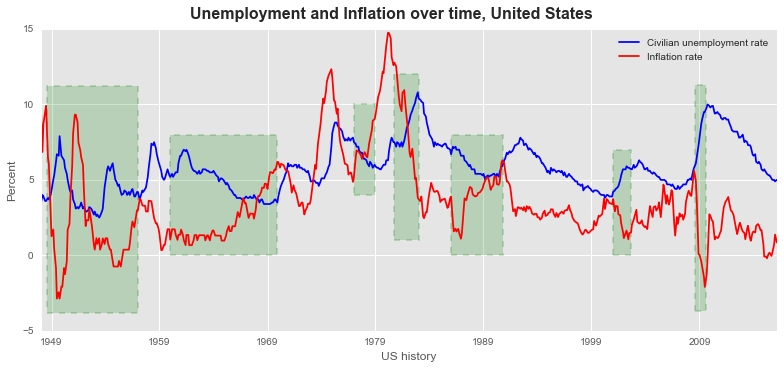

In [57]:
timefig = plt.figure()
timefig.set_size_inches(11, 5)
plt.plot(data1['date'], data1['civilian unemployment rate, percent'], 'b-', label='Civilian unemployment rate')
plt.plot(data1['date'], data1['inflation rate, percent'], 'r-', label='Inflation rate')
plt.legend()
plt.suptitle('Unemployment and Inflation over time, United States', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('US history')
plt.ylabel('Percent')

box_date('Aug 1948', '1957', -3.8, 15, 'g', 'g', 0.2)
box_date('1960', 'Dec 1969', 0, 8, 'g', 'g', 0.2)
box_date('1977', '1979', 4, 6, 'g', 'g', 0.2)
box_date('Oct 1980', '1983', 1, 11, 'g', 'g', 0.2)
box_date('1986', 'Nov 1990', 0, 8, 'g', 'g', 0.2)
box_date('2001', 'Sept 2002', 0, 7, 'g', 'g', 0.2)
box_date('Aug 2008', 'Aug 2009', -3.7, 15, 'g', 'g', 0.2)

plt.tight_layout()
plt.show()

In the 1970s, we observe spikes in both inflation and unemployment, corresponding to the stagflation of the time. In the regions boxed in green, inflation tends to rise while unemployment falls, or inflation tends to fall while unemployment rises.

**In the mid 1900s, this inverse relationship holds consistently.** However, **beginning in the 1970s, the Phillips pattern only appears sporadically**, and the Phillips curve can no longer predict the relationship between inflation and unemployment.

In [58]:
# http://www.econport.org/content/handbook/Unemployment/Phillips.html
def phillips_inflation(x, expected_inflation, response, u, n):
    return expected_inflation + response*(u - np.power(x, n))

def phillips_inflation_gen(params):
    return lambda x: phillips_inflation(x, *params)

def format_eq(expected_inflation, response, u, n, supply_shocks=0):
    if supply_shocks != 0:
        return "Inflation = \n%.3f%+.3f(%.3f-U^%.3f)+%.3f" % (expected_inflation, response, u, n, supply_shocks)
    return "Inflation = \n%.3f%+.3f(%.3f-U^%.3f)" % (expected_inflation, response, u, n)

## The Phillips curve: Do the data agree?

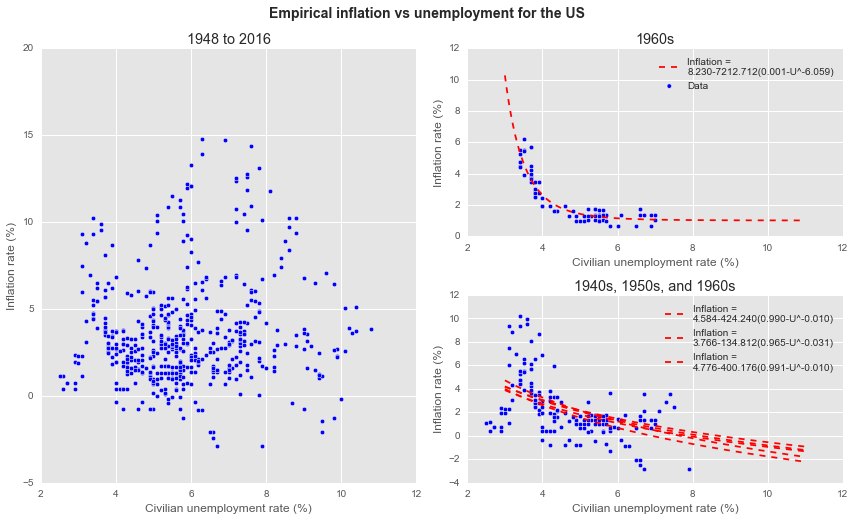

In [59]:
# Parameters:   expected_inflation, response, natural unemployment, n (unemployment exponent)
lower_bounds = [-np.inf, -np.inf, .001, -np.inf]
upper_bounds = [np.inf, np.inf, np.inf, -.01]

# 60s fit
data60s = data1[data1.decade == 1960]
paramopt60s, paramcov60s = scipy.optimize.curve_fit(phillips_inflation, data60s['civilian unemployment rate, percent'],
                                              data60s['inflation rate, percent'],# maxfev=10000,
                                              bounds=(lower_bounds, upper_bounds))
trialX = np.linspace(3, 11, 1000)
fitY60s = phillips_inflation(trialX, *paramopt60s)

data4560s = data1[data1.decade <= 1960]

# Plotting
phillipsfig = plt.figure()
phillipsfig.set_size_inches(12, 7)
phillipsfig.suptitle('Empirical inflation vs unemployment for the US', y=1.03, fontsize=14, fontweight='bold')

# Overall data
ax1 = phillipsfig.add_subplot(121)
# phillipsfig.subplots_adjust(top=1)
ax1.set_title('1948 to 2016')
ax1.set_xlabel('Civilian unemployment rate (%)')
ax1.set_ylabel('Inflation rate (%)')
plt.scatter(data1['civilian unemployment rate, percent'], data1['inflation rate, percent'],
            label='Data', marker='o')

# 1960s data
ax2 = phillipsfig.add_subplot(222)
phillipsfig.subplots_adjust(top=1)
ax2.set_title('1960s')
ax2.set_xlabel('Civilian unemployment rate (%)')
ax2.set_ylabel('Inflation rate (%)')
ax2.set_xlim([2,12])
plt.scatter(data60s['civilian unemployment rate, percent'], data60s['inflation rate, percent'],
            label='Data', marker='o')
plt.plot(trialX, fitY60s, 'r-',ls='--', label=format_eq(*paramopt60s))
ax2.legend()

# 1940s-1960s data
ax3 = phillipsfig.add_subplot(224)
phillipsfig.subplots_adjust(top=1)
ax3.set_title('1940s, 1950s, and 1960s')
ax3.set_xlabel('Civilian unemployment rate (%)')
ax3.set_ylabel('Inflation rate (%)')
ax3.set_xlim([2,12])
plt.scatter(data4560s['civilian unemployment rate, percent'], data4560s['inflation rate, percent'], label='Data',
            marker='o')
# 40s, 50s, 60s fit
handle_list=[]
for i in xrange(0, 5):
    sample4560s = data4560s.sample(60)
    paramopt4560s, paramcov4560s = scipy.optimize.curve_fit(phillips_inflation, sample4560s['civilian unemployment rate, percent'],
                                                  sample4560s['inflation rate, percent'],# maxfev=10000)
                                                  bounds=(lower_bounds, upper_bounds))
    fitY4560s = phillips_inflation(trialX, *paramopt4560s)
    handle, = plt.plot(trialX, fitY4560s, 'r-',ls='--', label=format_eq(*paramopt4560s))
    handle_list.append(handle)
ax3.legend(handles=handle_list[0:3])

plt.tight_layout()
plt.show()

In the 1960s, the relationship of inflation and unemployment follows a Phillips curve (downward curving trend) very well. **Overall, from 1940 to 1969, the short run Phillips curve was observed clearly in historical data.**

When visualizing unemployment and inflation for all historical data, you can't fit a line through the cloud of points. The data do not forma vertical line (the theoretical prediction), but you simultaneously cannot model the data with an inverse relationship.

## Short run Phillips curve
### Nonlinearized Phillips curve

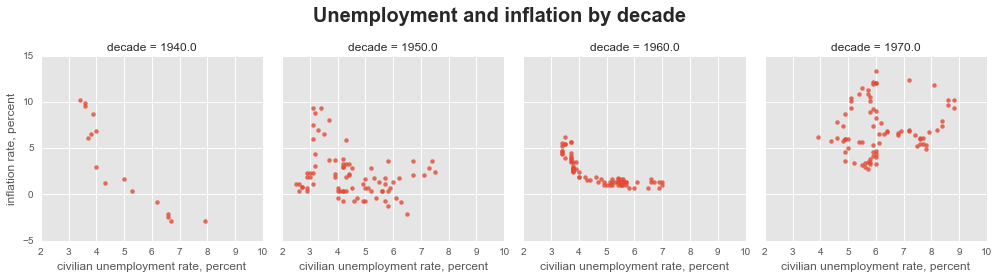

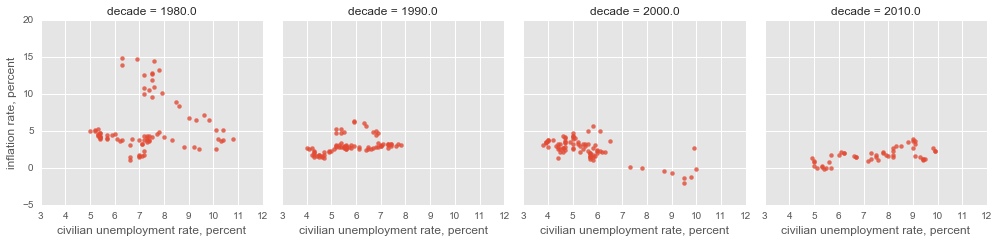

In [60]:
sns.lmplot(x='civilian unemployment rate, percent', y='inflation rate, percent',
           col='decade', data=data1[data1.decade <= 1970], fit_reg=False, size=3.5)

sns.plt.suptitle('Unemployment and inflation by decade', y=1.1, fontsize=20, fontweight='bold')

sns.lmplot(x='civilian unemployment rate, percent', y='inflation rate, percent',
           col='decade', data=data1[data1.decade > 1970], fit_reg=False, size=3.5)
sns.plt.show()

The trend seems to work in the 1940s and 1960s. There is a slight downward (linear) slope in 1950 and 2000. However, there is little to no relation, or a positive relationship, between inflation and unemployment in 1970, 1980, 1990 and the 2010s.
**The Phillips curve fails to accurately model unemployment and inflation in those decades.**

### Linearized Phillips curve - Should be upward sloping
When we plot the reciprocal unemployment rate versus the inflation rate, assuming that `n` in the Phillips equation is `-1`, we can create linear regressions in the short run. These lines of best fit should be **upward sloping** to show that as unemployment falls (`1/U` rises), that inflation rises.

**The lines are upward sloping in the 1940s, 1950s (slightly), 1960s, and 2000s**. The Phillips curve seems to work in these decades!

However, in the **1970s, 1980s, 1990s and 2010s**, we observe a **positive relationship between unemployment and inflation!** (a negative relationship between `1/U` and inflation. In these decades, the short run Phillips curve is broken.

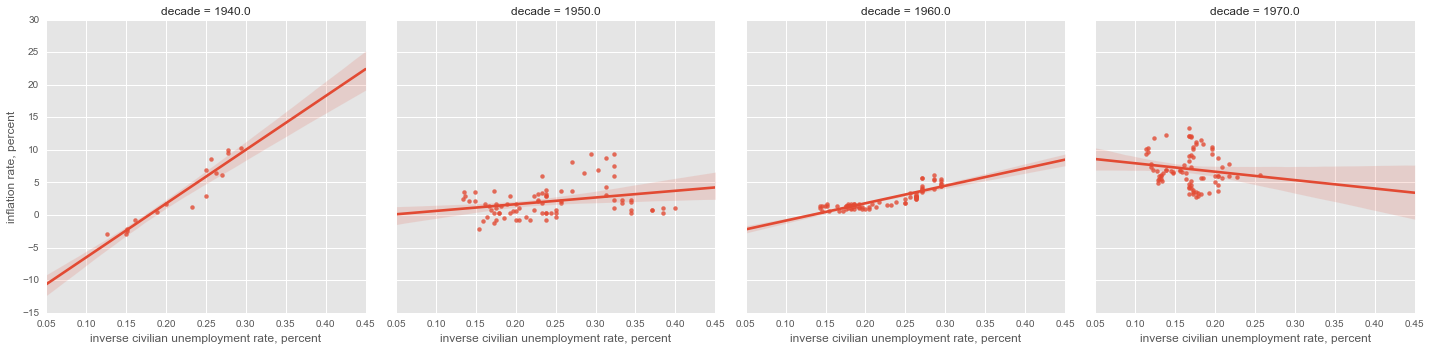

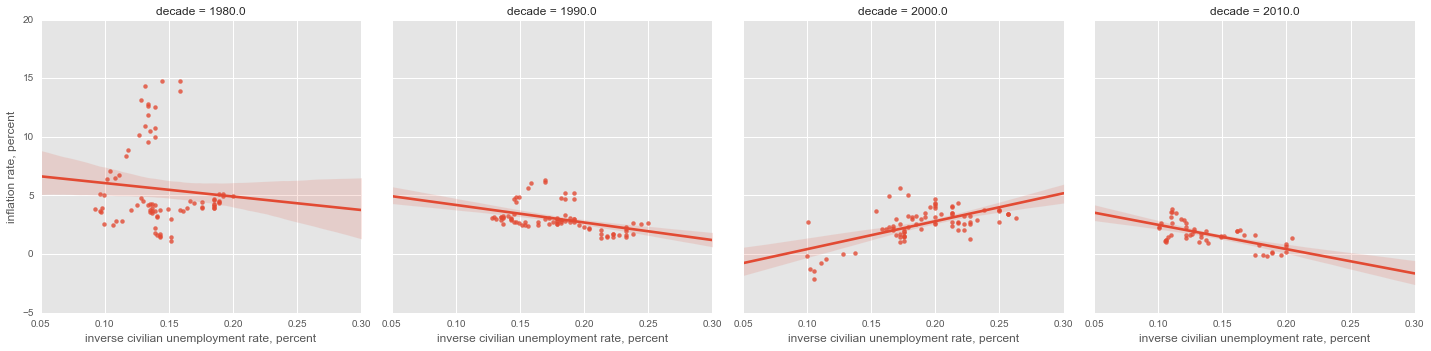

In [61]:
sns.lmplot(x='inverse civilian unemployment rate, percent', y='inflation rate, percent',
           col='decade', data=data1[data1.decade <= 1970])
sns.lmplot(x='inverse civilian unemployment rate, percent', y='inflation rate, percent',
           col='decade', data=data1[data1.decade > 1970])
sns.plt.show()

## The Phillips curve in the long run

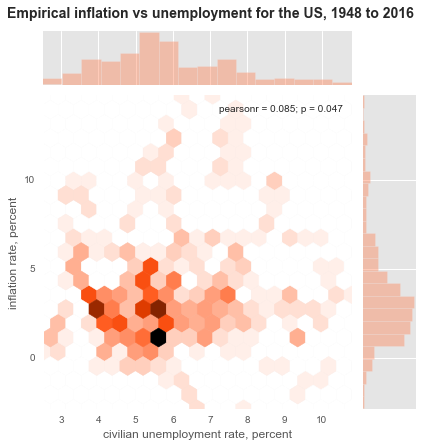

In [62]:
sns.jointplot(x='civilian unemployment rate, percent', y='inflation rate, percent', data=data1,
              kind="hex", color="coral")
sns.plt.gcf().suptitle('Empirical inflation vs unemployment for the US, 1948 to 2016', y=1.03, fontsize=14, fontweight='bold')
sns.plt.show()

### Investigating possible seasonal variation in the long run
Finally, we examine how unemployment and inflation vary seasonally, with the hypothesis that the long run Phillips curve is more evident in certain months. Qualitatively, there appears to be **lower unemployment in December and the last half of the year**. **There also seems to be more variance in the rate of inflation in the latter half of the year**.

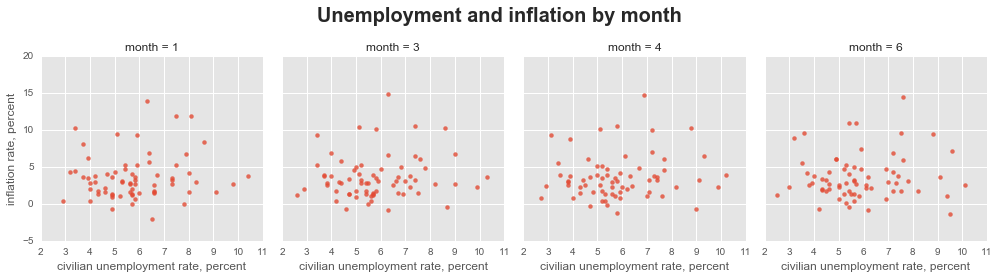

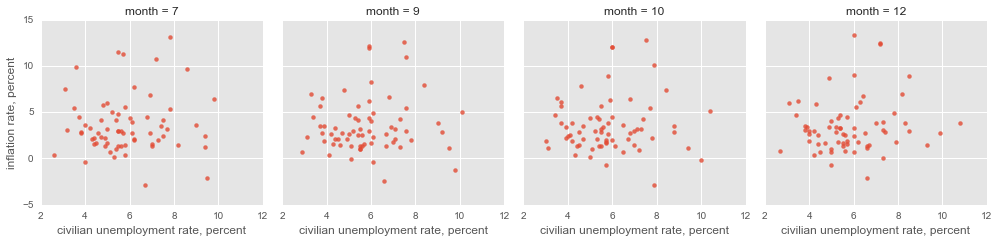

In [63]:
sns.lmplot(x='civilian unemployment rate, percent', y='inflation rate, percent',
           col='month', data=data1[data1.month <= 6], fit_reg=False, size=3.5)

sns.plt.suptitle('Unemployment and inflation by month', y=1.1, fontsize=20, fontweight='bold')

sns.lmplot(x='civilian unemployment rate, percent', y='inflation rate, percent',
           col='month', data=data1[data1.month > 6], fit_reg=False, size=3.5)
sns.plt.show()